In [2]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel("example_filtration rate_fullfact.xlsx")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [10]:
df

,T,P,CoF,RPM,Filtration_rate
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,1,1,-1,-1,65
4,-1,-1,1,-1,68
5,1,-1,1,-1,60
6,-1,1,1,-1,80
7,1,1,1,-1,65
8,-1,-1,-1,1,43
9,1,-1,-1,1,100


/var/folders/f6/n5jgvlts02x0r0ybxm7kz_540000gp/T/ipykernel_2198/2927051234.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=factor, y=response_var, data=data, ci="sd", markers="o", linestyles="-")


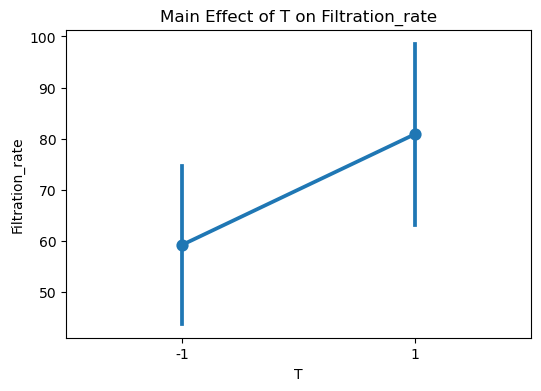

/var/folders/f6/n5jgvlts02x0r0ybxm7kz_540000gp/T/ipykernel_2198/2927051234.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=factor, y=response_var, data=data, ci="sd", markers="o", linestyles="-")


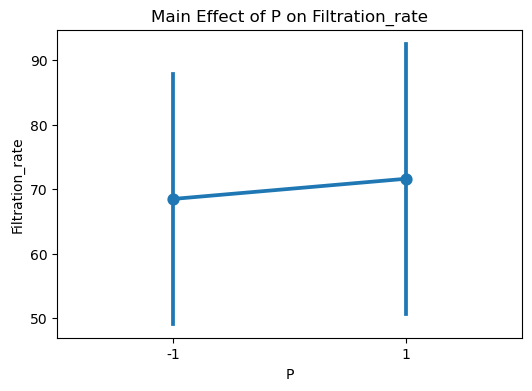

/var/folders/f6/n5jgvlts02x0r0ybxm7kz_540000gp/T/ipykernel_2198/2927051234.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=factor, y=response_var, data=data, ci="sd", markers="o", linestyles="-")


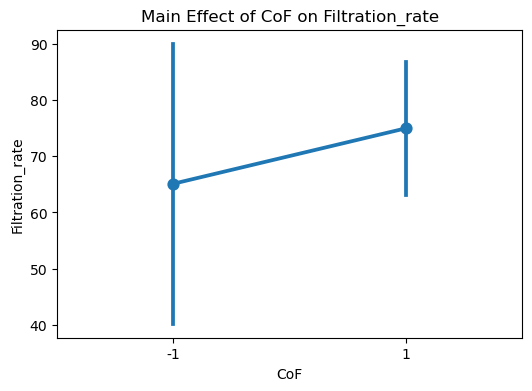

/var/folders/f6/n5jgvlts02x0r0ybxm7kz_540000gp/T/ipykernel_2198/2927051234.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=factor, y=response_var, data=data, ci="sd", markers="o", linestyles="-")


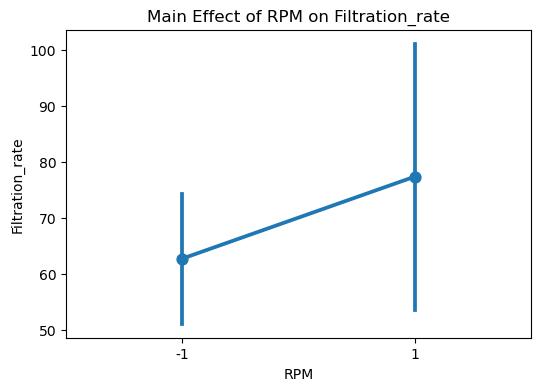

In [11]:
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is loaded in a dataframe called `df`
# and has columns 'Temperature', 'Pressure', 'Concentration', 'Stirring_rate', and 'Filtration_rate'

def plot_main_effects(data, response_var):
    # Get all columns except the response variable
    factors = [col for col in data.columns if col != response_var]
    
    # Plot each factor's main effect
    for factor in factors:
        plt.figure(figsize=(6, 4))
        sns.pointplot(x=factor, y=response_var, data=data, ci="sd", markers="o", linestyles="-")
        plt.title(f"Main Effect of {factor} on {response_var}")
        plt.xlabel(factor)
        plt.ylabel(response_var)
        plt.show()

# Call the function with your dataframe and response variable
plot_main_effects(df, 'Filtration_rate')

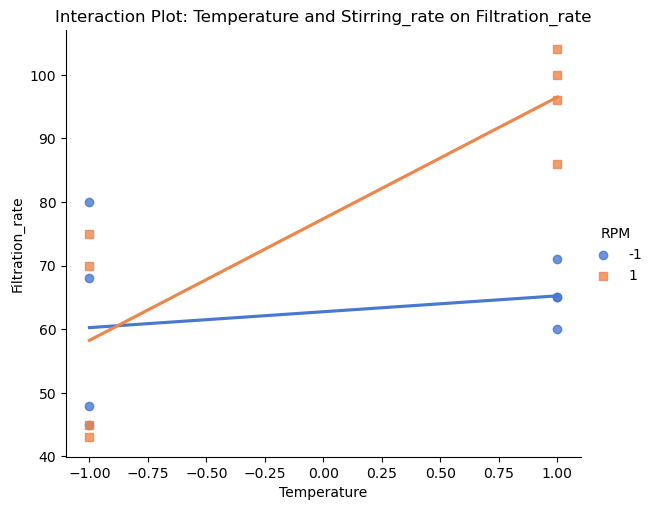

In [12]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Plotting interaction between Temperature and Stirring_rate on Filtration_rate
sns.lmplot(x="T", y="Filtration_rate", hue="RPM", data=df, 
           markers=["o", "s"], ci=None, aspect=1.2, palette="muted")

# Customize the plot
plt.title("Interaction Plot: Temperature and Stirring_rate on Filtration_rate")
plt.xlabel("Temperature")
plt.ylabel("Filtration_rate")
plt.show()

<Figure size 800x600 with 0 Axes>

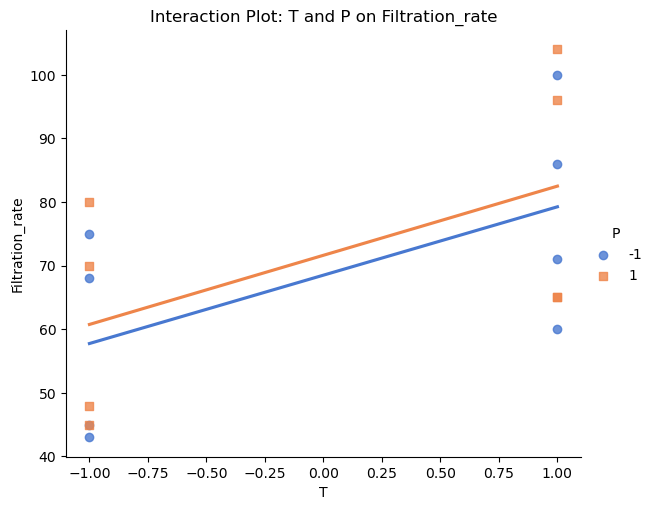

<Figure size 800x600 with 0 Axes>

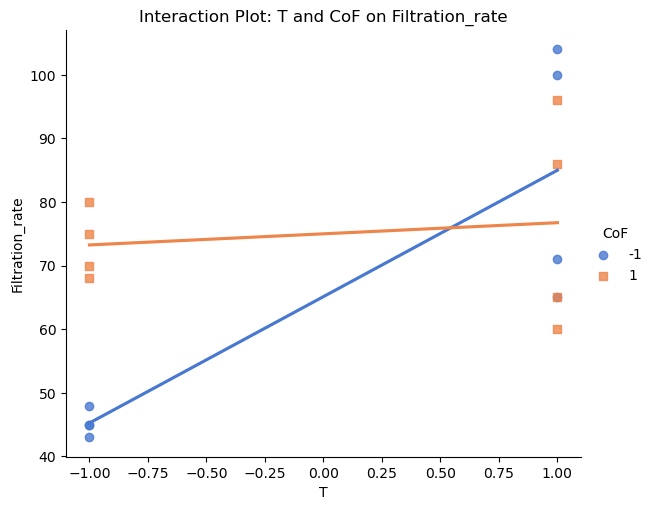

<Figure size 800x600 with 0 Axes>

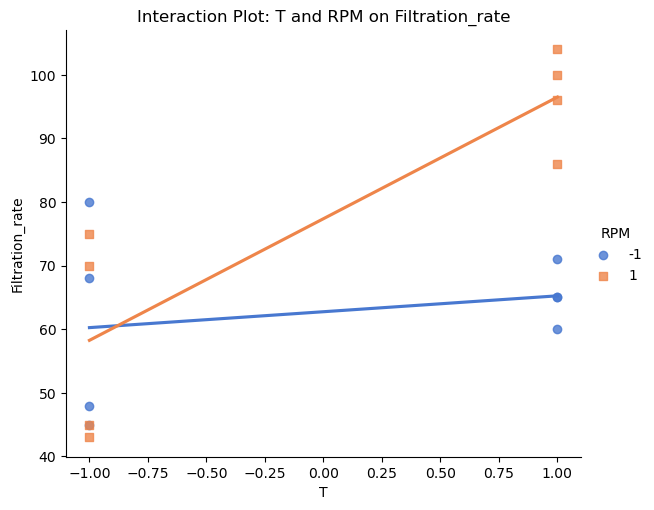

<Figure size 800x600 with 0 Axes>

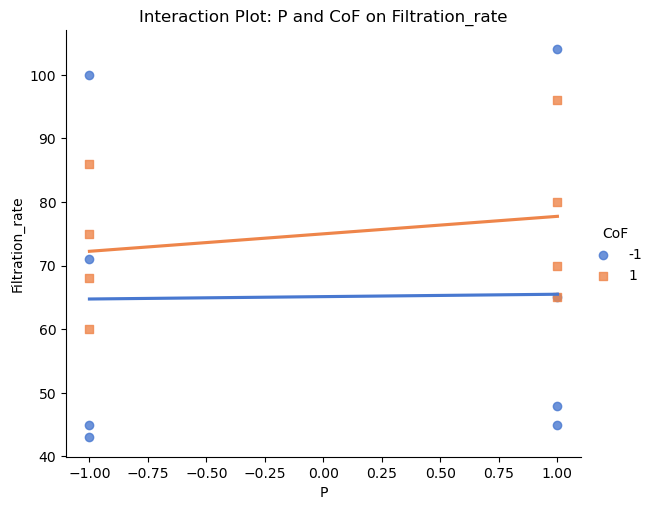

<Figure size 800x600 with 0 Axes>

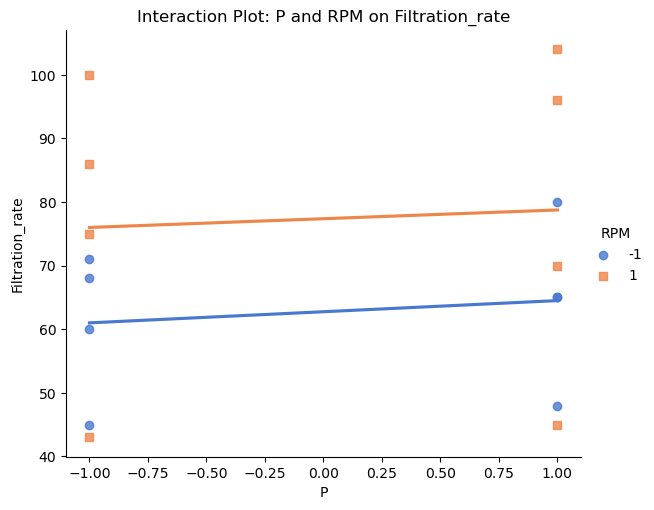

<Figure size 800x600 with 0 Axes>

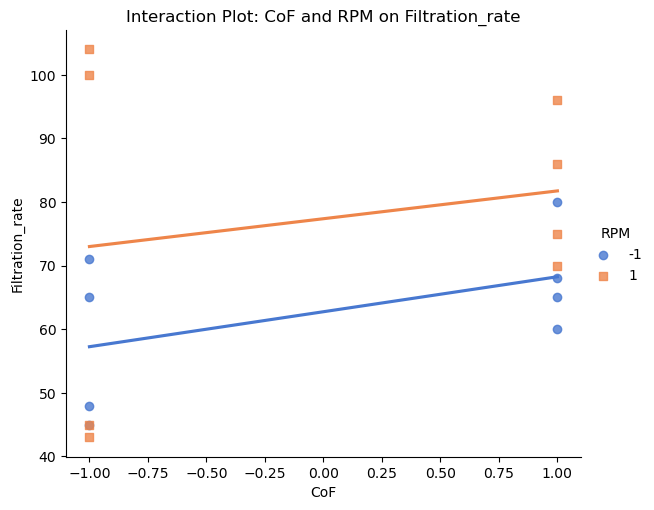

In [13]:
#import seaborn as sns
#import matplotlib.pyplot as plt
from itertools import combinations

# Define a function to create interaction plots for all pairs of factors
def plot_all_interactions(data, response_var):
    # Extract factor columns (assume all columns except the response are factors)
    factors = [col for col in data.columns if col != response_var]
    
    # Generate all possible pairs of factors
    factor_pairs = combinations(factors, 2)
    
    # Create an interaction plot for each pair
    for factor_x, factor_hue in factor_pairs:
        plt.figure(figsize=(8, 6))
        sns.lmplot(x=factor_x, y=response_var, hue=factor_hue, data=data, 
                   markers=["o", "s"], ci=None, aspect=1.2, palette="muted")
        plt.title(f"Interaction Plot: {factor_x} and {factor_hue} on {response_var}")
        plt.xlabel(factor_x)
        plt.ylabel(response_var)
        plt.show()

# Use the function with your dataframe and response variable
plot_all_interactions(df, 'Filtration_rate')

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the model
formula = 'Filtration_rate ~ T + CoF + RPM + T:CoF + T:RPM'

# Fit the model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model)

# Print the ANOVA results
print(anova_results)

            df     sum_sq    mean_sq          F    PR(>F)
T          1.0  1870.5625  1870.5625  95.864830  0.000002
CoF        1.0   390.0625   390.0625  19.990391  0.001195
RPM        1.0   855.5625   855.5625  43.846893  0.000059
T:CoF      1.0  1314.0625  1314.0625  67.344651  0.000009
T:RPM      1.0  1105.5625  1105.5625  56.659193  0.000020
Residual  10.0   195.1250    19.5125        NaN       NaN


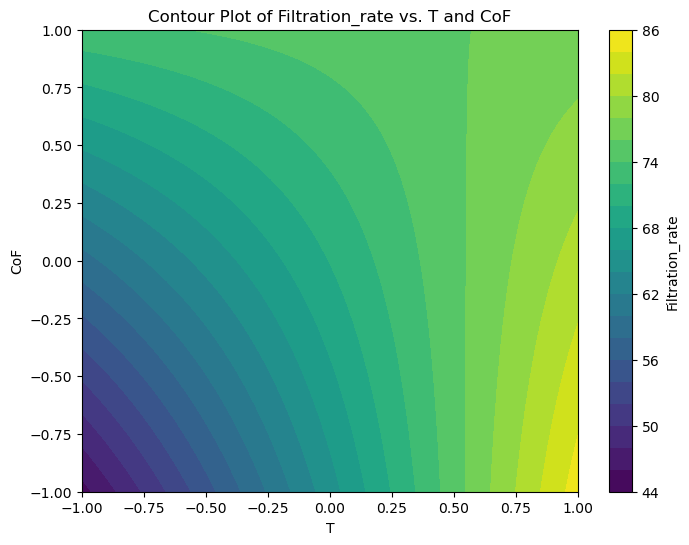

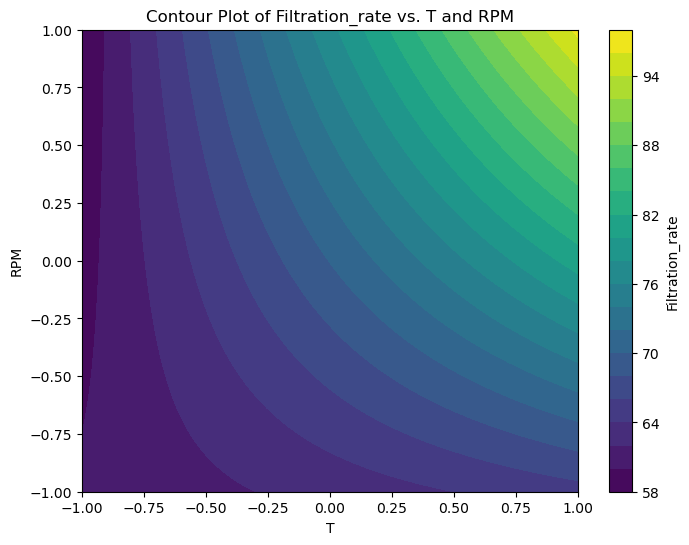

In [15]:
import numpy as np
#import matplotlib.pyplot as plt

# Define a function to create contour plots for each interaction
def contour_plot(model, df, factor_x, factor_y, response_var, num_points=100):
    # Generate a grid of values for the two factors
    x_range = np.linspace(df[factor_x].min(), df[factor_x].max(), num_points)
    y_range = np.linspace(df[factor_y].min(), df[factor_y].max(), num_points)
    X, Y = np.meshgrid(x_range, y_range)
    
    # Create a DataFrame with the grid values and set other factors to their mean
    grid_data = pd.DataFrame({factor_x: X.ravel(), factor_y: Y.ravel()})
    for col in df.columns:
        if col not in [factor_x, factor_y, response_var]:
            grid_data[col] = df[col].mean()
    
    # Use the model to predict Filtration_rate on the grid
    Z = model.predict(grid_data).values.reshape(num_points, num_points)
    
    # Plot the contour
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, Z, cmap="viridis", levels=20)
    plt.colorbar(contour, label=response_var)
    plt.xlabel(factor_x)
    plt.ylabel(factor_y)
    plt.title(f"Contour Plot of {response_var} vs. {factor_x} and {factor_y}")
    plt.savefig(f"contour_{factor_x}_{factor_y}.jpeg", dpi=600)
    plt.show()

# Plot contours for interactions: T and CoF, T and RPM
contour_plot(model, df, 'T', 'CoF', 'Filtration_rate')
contour_plot(model, df, 'T', 'RPM', 'Filtration_rate')

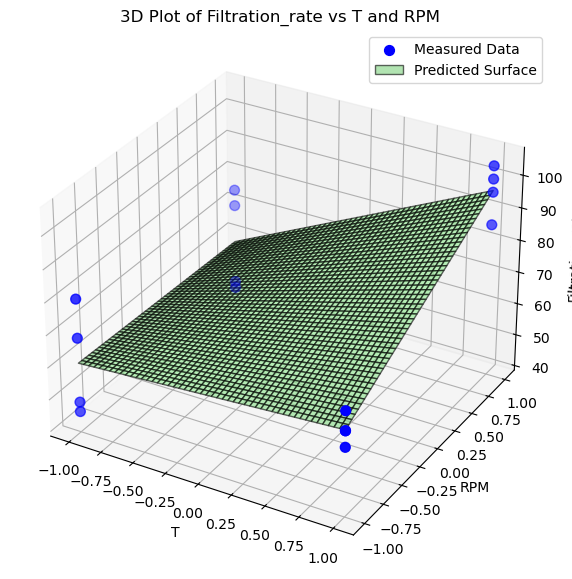

In [16]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot function to visualize both measured and predicted values
def plot_3d_predictions(model, df, factor_x, factor_y, response_var, num_points=50):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot of the measured data
    ax.scatter(df[factor_x], df[factor_y], df[response_var], color='blue', label='Measured Data', s=50)
    
    # Generate a grid of values for Temperature and Stirring_rate
    x_range = np.linspace(df[factor_x].min(), df[factor_x].max(), num_points)
    y_range = np.linspace(df[factor_y].min(), df[factor_y].max(), num_points)
    X, Y = np.meshgrid(x_range, y_range)
    
    # Create a DataFrame for the grid and set other factors to their mean values
    grid_data = pd.DataFrame({factor_x: X.ravel(), factor_y: Y.ravel()})
    for col in df.columns:
        if col not in [factor_x, factor_y, response_var]:
            grid_data[col] = df[col].mean()
    
    # Predict filtration rate on the grid using the model
    Z = model.predict(grid_data).values.reshape(num_points, num_points)
    
    # Plot the predicted surface
    ax.plot_surface(X, Y, Z, color='lightgreen', alpha=0.6, edgecolor='k', label='Predicted Surface')
    
    # Labels and legend
    ax.set_xlabel(factor_x)
    ax.set_ylabel(factor_y)
    ax.set_zlabel(response_var)
    ax.set_title(f"3D Plot of {response_var} vs {factor_x} and {factor_y}")
    ax.legend()
    plt.savefig(f"3d_plot_{factor_x}_{factor_y}.jpeg", dpi=600)
    plt.show()

# Call the function with your dataframe and model
plot_3d_predictions(model, df, 'T', 'RPM', 'Filtration_rate')